In [4]:
# import necessary libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

In [2]:
# Read Data 
df = pd.read_csv('diabetes.csv')

In [3]:
# Show the first 5 Rows.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Inspect data strcture and types. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Check for NULL values.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# Check for duplicate Rows.
df.duplicated().sum()

0

In [12]:
# Show Statistical Summary for the Data .
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


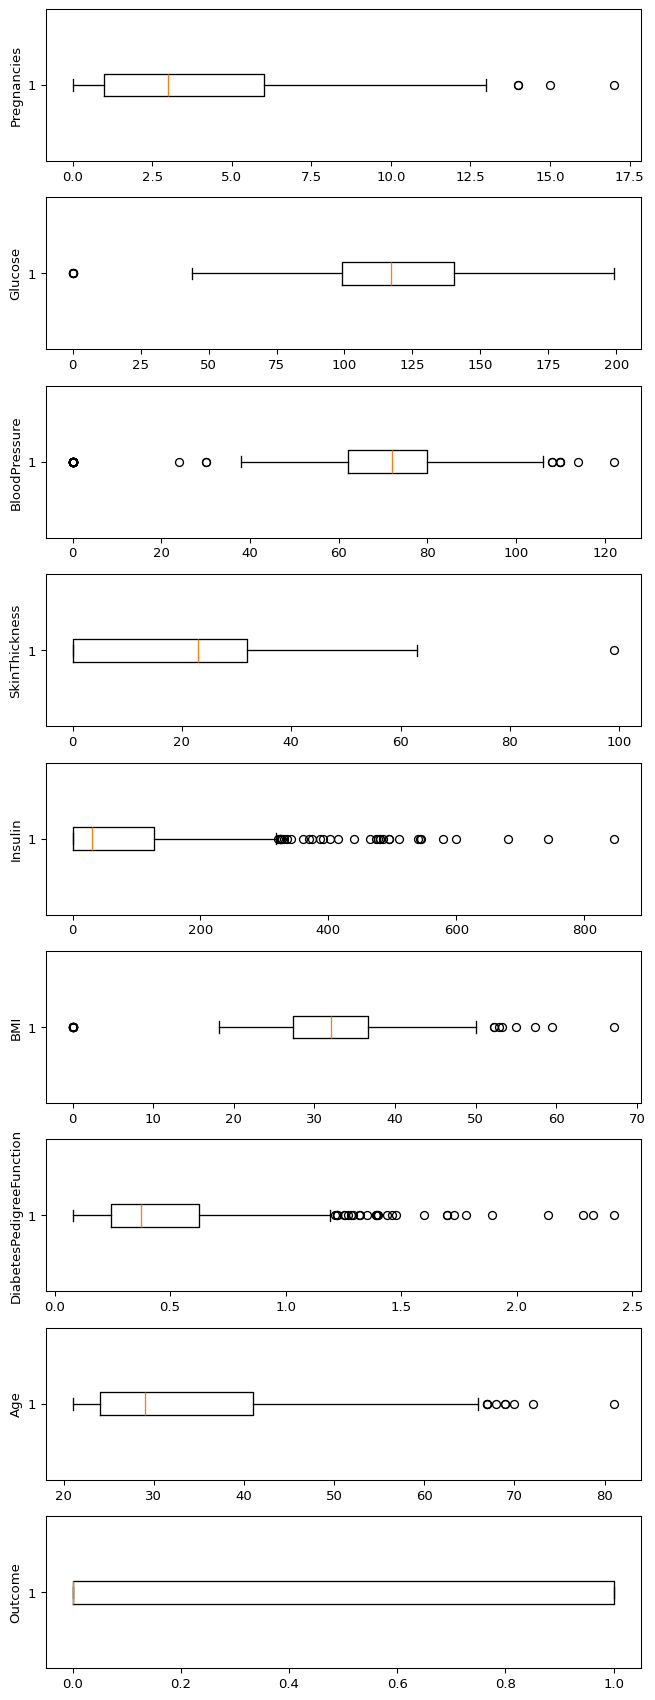

In [13]:
# Visualizing Outliers Using boxplot.
fig, axs = plt.subplots(len(df.columns), 1, figsize=(7, 18), dpi=95)
for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()

In [23]:
# Remove Outliers Using IQR.
def remove_outliers_iqr(df, column):
    q1, q3 = np.percentile(df[column].dropna(), [25, 75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return df[(df[column] >= lower) & (df[column] <= upper)]

In [24]:
# List of columns to clean
cols_to_clean = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Apply the function to each column
clean_df = df.copy()
for col in cols_to_clean:
    clean_df = remove_outliers_iqr(clean_df, col)

# Result
print("Original shape:", df.shape)
print("After outlier removal:", clean_df.shape)

Original shape: (768, 9)
After outlier removal: (676, 9)


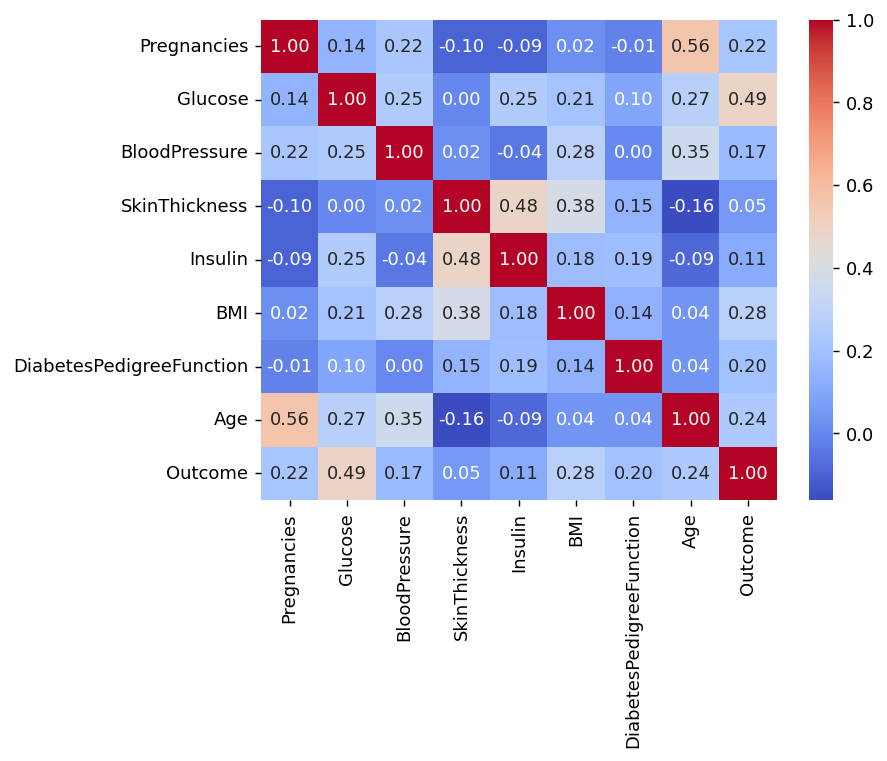

Outcome                     1.000000
Glucose                     0.487913
BMI                         0.276406
Age                         0.237564
Pregnancies                 0.215407
DiabetesPedigreeFunction    0.199311
BloodPressure               0.171612
Insulin                     0.114642
SkinThickness               0.053295
Name: Outcome, dtype: float64


In [31]:
# Understand relationships (Correclation) between features and the target variable (Outcome).
corr = clean_df.corr()
plt.figure(dpi=130)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

print(corr['Outcome'].sort_values(ascending=False)) # Sorting correlations, highlights features most correlated with the target.

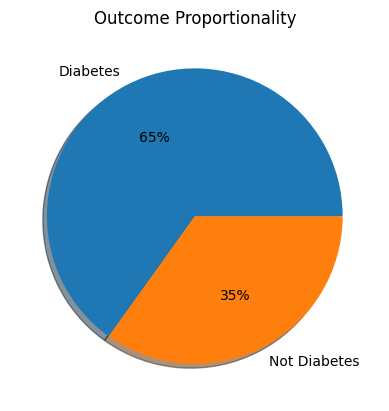

In [32]:
# Visualize Target Variable Distribution.
# Check if target classes (Diabetes vs Not Diabetes) are balanced, affecting model training and evaluation.
plt.pie(df['Outcome'].value_counts(), labels=['Diabetes', 'Not Diabetes'], autopct='%.f%%', shadow=True)
plt.title('Outcome Proportionality')
plt.show()

In [33]:
# Separate Features and Target Variable.
X = clean_df.drop(columns=['Outcome'])
y = clean_df['Outcome']

In [34]:
# Apply Feature Scaling: Normalization or Standardization.
# Normalization (Min-Max Scaling) make the data values in range (0,1):
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
print(X_normalized[:5])

[[0.46153846 0.67096774 0.5        0.58333333 0.         0.49044586
  0.24841629 0.48333333]
 [0.07692308 0.26451613 0.41176471 0.48333333 0.         0.26751592
  0.12352941 0.16666667]
 [0.61538462 0.89677419 0.38235294 0.         0.         0.16242038
  0.26877828 0.18333333]
 [0.07692308 0.29032258 0.41176471 0.38333333 0.28484848 0.31528662
  0.04027149 0.        ]
 [0.         0.6        0.02941176 0.58333333 0.50909091 0.79299363
  1.         0.2       ]]


In [35]:
# Standardization (StandarScaler) make the data values has (0 mean, 1 varinace):
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
print(X_standardized[:5])

[[ 0.66434967  0.94629047 -0.01508895  0.94333766 -0.81985452  0.25364561
   0.50183557  1.43093305]
 [-0.86424249 -1.17167351 -0.54268203  0.55038525 -0.81985452 -0.8461904
  -0.37335463 -0.19192824]
 [ 1.27578653  2.12293713 -0.7185464  -1.34888469 -0.81985452 -1.36468451
   0.64452962 -0.10651449]
 [-0.86424249 -1.03719961 -0.54268203  0.15743285  0.30393934 -0.61051125
  -0.95681476 -1.04606576]
 [-1.16996092  0.57648724 -2.82891872  0.94333766  1.18862812  1.74628019
   5.76883165 -0.02110073]]


In [36]:
clean_df.shape

(676, 9)